# Perkenalan

Nama : Kevin Giovanni Padana

Batch : 007

Gambaran Data

Data didapatkan dan dikumpulkan dari Kickstarter Platform dan dapat digunakan untuk analisis proyek.

seluruh column memiliki deskripsi sama seperti artinya, kecuali:

* usd_pledged: konversi dalam dolar AS dari the pledged column 
* usd_pledge_real: konversi dalam dolar AS dari the pledged column 
* usd_goal_real: konversi dalam dolar AS dari the goal column 

data yang digunakan merupakan data kickstarter atau pendanaan project dengan cara crowdfunding yang dapat didownload di laman berikut:

https://www.kaggle.com/kemical/kickstarter-projects?select=ks-projects-201801.csv

disini saya ingin mencari perbandingan antara project dengan category film & video apakah secara signifikan lebih berpengaruh dibanding music category dengan batasan projek menggunakan data projek khusus di negara amerika serikat.

## Import Pustaka

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline
import seaborn as sns


## Data Loading

#### Loading Dataset

In [2]:
#loading dataset kickstarter 2018
data = pd.read_csv('ks-projects-201801.csv')

#### Menampilkan 5 data teratas

In [3]:
#check first 5 data teratas
data.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


Penjelasan Data :
1. name : nama project 
2. category : cabang kategori project 
3. main_category : kategori utama project
4. currency : mata uang project
5. deadline : tanggal deadline project
6. goal : perkiraan jumlah dana
7. launched : tanggal project akan diluncurkan
8. pledged : jumlah uang diinvest 
9. backers : jumlah investor yang sudah berinvenstasi
10. country : negara asal project
11. usd pledged : jumlah uang diinvest dalam satuan dollar
12. usd_pledged_real : jumlah uang yang didapatkan selama project berjalan
13. usd_goal_real : jumlah uang amal yang diminta

#### Melihat jumlah baris dan kolom dataset

In [4]:
data.shape

(378661, 15)

#### Melihat informasi dataset

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   ID                378661 non-null  int64  
 1   name              378657 non-null  object 
 2   category          378661 non-null  object 
 3   main_category     378661 non-null  object 
 4   currency          378661 non-null  object 
 5   deadline          378661 non-null  object 
 6   goal              378661 non-null  float64
 7   launched          378661 non-null  object 
 8   pledged           378661 non-null  float64
 9   state             378661 non-null  object 
 10  backers           378661 non-null  int64  
 11  country           378661 non-null  object 
 12  usd pledged       374864 non-null  float64
 13  usd_pledged_real  378661 non-null  float64
 14  usd_goal_real     378661 non-null  float64
dtypes: float64(5), int64(2), object(8)
memory usage: 43.3+ MB


#### Melihat kolom didalam dataset

In [6]:
data.columns

Index(['ID', 'name', 'category', 'main_category', 'currency', 'deadline',
       'goal', 'launched', 'pledged', 'state', 'backers', 'country',
       'usd pledged', 'usd_pledged_real', 'usd_goal_real'],
      dtype='object')

#### Melihat statistik dataset untuk tiap kolom

In [7]:
data.describe()

,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real
count,3.786610e+05,3.786610e+05,3.786610e+05,378661.000000,3.748640e+05,3.786610e+05,3.786610e+05
mean,1.074731e+09,4.908079e+04,9.682979e+03,105.617476,7.036729e+03,9.058924e+03,4.545440e+04
std,6.190862e+08,1.183391e+06,9.563601e+04,907.185035,7.863975e+04,9.097334e+04,1.152950e+06
min,5.971000e+03,1.000000e-02,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,1.000000e-02
25%,5.382635e+08,2.000000e+03,3.000000e+01,2.000000,1.698000e+01,3.100000e+01,2.000000e+03
50%,1.075276e+09,5.200000e+03,6.200000e+02,12.000000,3.947200e+02,6.243300e+02,5.500000e+03
75%,1.610149e+09,1.600000e+04,4.076000e+03,56.000000,3.034090e+03,4.050000e+03,1.550000e+04
max,2.147476e+09,1.000000e+08,2.033899e+07,219382.000000,2.033899e+07,2.033899e+07,1.663614e+08


## Data Cleaning

#### Melihat missing values pada dataset

In [8]:
#Check missing data

#get the number of missing data per columns
missing_values_count = data.isnull().sum().sort_values(ascending= False)

#look at the number of missing values
missing_values_count[:]

usd pledged         3797
name                   4
ID                     0
category               0
main_category          0
currency               0
deadline               0
goal                   0
launched               0
pledged                0
state                  0
backers                0
country                0
usd_pledged_real       0
usd_goal_real          0
dtype: int64

Berdasarkan penelusuran data diatas, terlihat bahwa kolom usd pledged dan kolom name memiliki missing values. 

maka saya memutuskan untuk menghilangkan kolom usd pledged namun saya gantikan peran kolom tersebut dengan usd_pledged_real. Sedangkan untuk missing values di kolom akan di hilangkan data yang kosong.

#### Menghapus kolom usd_pledged dan ID

In [9]:
#delete column 'usd pledged'
data.drop(['usd pledged'], axis=1, inplace=True)

data usd pledged memiliki format yang salah dan memiliki missing values yang lumayan banyak oleh karena itu kolom dihapus

In [10]:
data.drop(['ID'], axis=1, inplace=True)

data ID dihapus dengan alasan tidak terlalu digunakan untuk proses analisis

#### Menghapus data dengan missing values pada kolom name

In [11]:
#delete all missing values in name column
data.dropna(inplace=True)

#### Membuat margin antara nilai goal dan pledged 

In [12]:
data["pledged_goal_margin"] = data["usd_goal_real"] - data["usd_pledged_real"]

#### Melakukan pengecekan ulang terhadap dataset

In [13]:
#check missing values again in dataframe
data.isnull().sum().sort_values(ascending=False)

name                   0
category               0
main_category          0
currency               0
deadline               0
goal                   0
launched               0
pledged                0
state                  0
backers                0
country                0
usd_pledged_real       0
usd_goal_real          0
pledged_goal_margin    0
dtype: int64

Dapat dilihat data telah bersih dari missing values dan kolom usd pledged sudah tidak tersedia lagi didalam data. Oleh karena itu data sudah dapat digunakan

## Data Exploration

In [14]:
data

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd_pledged_real,usd_goal_real,pledged_goal_margin
0,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,1533.95,1533.95
1,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,2421.0,30000.00,27579.00
2,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,45000.00,44780.00
3,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,5000.00,4999.00
4,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,19500.00,18217.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378656,ChknTruk Nationwide Charity Drive 2014 (Canceled),Documentary,Film & Video,USD,2014-10-17,50000.0,2014-09-17 02:35:30,25.0,canceled,1,US,25.0,50000.00,49975.00
378657,The Tribe,Narrative Film,Film & Video,USD,2011-07-19,1500.0,2011-06-22 03:35:14,155.0,failed,5,US,155.0,1500.00,1345.00
378658,Walls of Remedy- New lesbian Romantic Comedy f...,Narrative Film,Film & Video,USD,2010-08-16,15000.0,2010-07-01 19:40:30,20.0,failed,1,US,20.0,15000.00,14980.00
378659,BioDefense Education Kit,Technology,Technology,USD,2016-02-13,15000.0,2016-01-13 18:13:53,200.0,failed,6,US,200.0,15000.00,14800.00


In [15]:
clean_data = data.copy()

#### Query Data

disini data yang digunakan fokus di bagian status failed dan success karena kedua status tersebut merupakan 2 kategori data paling banyak dibanding status lainnya dan project yang dianalisis hanya khusus di negara US dengan mata uang USD

In [16]:
#query dengan state failed dan successful
df = clean_data[(clean_data['state'] == 'failed') | (clean_data['state'] == 'successful')]
#mengambil data di negara us saja
df = df[(df['country'] == 'US')]


In [17]:
#melihat status project
df.state.unique()

array(['failed', 'successful'], dtype=object)

##### Query tiap kategori state

In [18]:
#Membuat query success
success = df[df.state == 'successful']

In [19]:
#Membuat query failed
failed = df[df.state == 'failed']

C:\Users\DATA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 0, 'Amount Pledged in Millions'),
 Text(0, 0.5, 'Goal in Millions'),
 Text(0.5, 1.0, 'Goal vs. Pledged')]

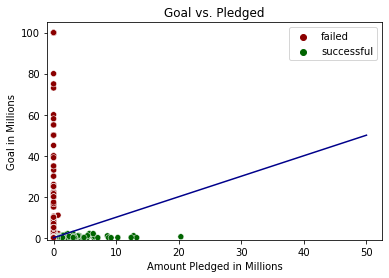

In [20]:
#membuat variabel warna untuk plotting
colors = ('darkred','darkgreen')

#membuat plot dengan seaborn dan menetapkan values dalam satuan (juta)
ax = sns.scatterplot(df.usd_pledged_real/1e6, df.usd_goal_real/1e6, hue=df.state, palette=colors)
#menambahkan garis biru untuk pembatas data berhasil dan gagal
sns.lineplot(x=(0,50), y=(0,50), color='darkblue')

ax.set(ylim=(-1,None), xlim=(-1,None))
#menambahkan judul dan label untuk sumbu X dan Y
ax.set(xlabel='Amount Pledged in Millions', ylabel='Goal in Millions', title= 'Goal vs. Pledged')

berdasarkan grafik diatas dapat diketahui bahwa usd_pledged_real dan usd_goal_real mempengaruhi keberhasilan suatu projek dalam kickstarter. akan tetapi nilai pledged real lebih berpengaruh dalam kesuksesan suatu project

## Measure of Central Tendency

#### Mencari rata-rata pledged_goal_margin

In [21]:
#mencari rata-rata margin antara goal dengan pledged dengan status sukses
success_mean = success['pledged_goal_margin'].mean()
print('nilai rata-rata margin pledged dan goal dengan status sucess : ' + str(success_mean))

nilai rata-rata margin pledged dan goal dengan status sucess : -13517.216149278507


In [22]:
#mencari rata-rata margin antara goal dengan pledged dengan status failed
failed_mean = failed['pledged_goal_margin'].mean()
print('nilai rata-rata margin pledged dan goal dengan status sucess : ' + str(failed_mean))

nilai rata-rata margin pledged dan goal dengan status sucess : 59332.30523783513


#### Mean, Median dan Mode Numerical Data

In [23]:
#menampilkan mean untuk seluruh kolom dengan tipe data numerikal di dataset
print('{} \t{}'.format('Column Name', 'Mean').expandtabs(30))
print('*'*70)
for col in df.select_dtypes('number'):
    print('{} \t{}'.format(col, df[col].mean()).expandtabs(30))


Column Name                   Mean
**********************************************************************
goal                          39348.929280335746
pledged                       10482.038677178549
backers                       122.7456553845683
usd_pledged_real              10482.038677178549
usd_goal_real                 39348.929280335746
pledged_goal_margin           28866.890603156775


In [24]:
#menampilkan median untuk seluruh kolom dengan tipe data numerikal di dataset

print('{} \t{}'.format('Column Name', 'Median').expandtabs(30))
print('*'*70)
for col in df.select_dtypes('number'):
    print('{} \t{}'.format(col, df[col].median()).expandtabs(30))

Column Name                   Median
**********************************************************************
goal                          5000.0
pledged                       910.0
backers                       17.0
usd_pledged_real              910.0
usd_goal_real                 5000.0
pledged_goal_margin           1035.0


In [25]:
##menampilkan modus untuk seluruh kolom dengan tipe data numerikal di dataset

print('{} \t{}'.format('Column Name', 'Mode').expandtabs(40))
print('*'*70)
for col in df.select_dtypes('number'):
    print('{} \t{}'.format(col, df[col].mode()[0]).expandtabs(40))

Column Name                             Mode
**********************************************************************
goal                                    5000.0
pledged                                 0.0
backers                                 0
usd_pledged_real                        0.0
usd_goal_real                           5000.0
pledged_goal_margin                     0.0


#### Mode Kategorikal Data

In [26]:
#menampilkan mode untuk seluruh kolom dengan tipe data kategorikal di dataset

print('{} \t{} '.format('Column Name', 'Mode').expandtabs(40))
print('*'*70)
for col in df.select_dtypes('object'):
    print('{} \t{} '.format(col, df[col].mode()[0]).expandtabs(40))

Column Name                             Mode 
**********************************************************************
name                                    New EP/Music Development 
category                                Product Design 
main_category                           Film & Video 
currency                                USD 
deadline                                2014-08-08 
launched                                2009-09-15 05:56:28 
state                                   failed 
country                                 US 


#### Mean, Median, Mode untuk usd_pledged_real

membuat variabel pledged real untuk menyimpan dataframe dengan nilai usd_real_pledged saja

In [27]:
pledged_real = df.usd_pledged_real

Mean pledged_real

mencari rata-rata pledged secara umum

In [28]:
pledged_mean = pledged_real.mean()
print('mean of pledged real :' + str(pledged_mean))

mean of pledged real :10482.038677178549


In [29]:
pledged_median = pledged_real.median()
print('median of pledged real :' + str(pledged_median))

median of pledged real :910.0


In [30]:
pledged_mode = pledged_real.mode()
print('mode of pledged real : ' + str(pledged_mode[0]))

mode of pledged real : 0.0


## Measure of Variance

**1. Range**

**2. Variance**

**3. Standard Deviation**

### Range

mencari range untuk tiap data numerikal di dataset

In [31]:
for col in df.select_dtypes('number'):
    print(df[col].name + ' range : ' + str(df[col].max() - df[col].min()))

goal range : 99999999.99
pledged range : 20338986.27
backers range : 219382
usd_pledged_real range : 20338986.27
usd_goal_real range : 99999999.99
pledged_goal_margin range : 119838986.27


didapatkan nilai range usd_pledged_real = 20338986.27

#### Variance

mencari variance untuk tiap data numerikal di dataset

In [32]:
for col in df.select_dtypes('number'):
    print(df[col].name + ' variance : ' + str(df[col].var()))

goal variance : 1072137138394.2762
pledged variance : 10946000277.51331
backers variance : 1080187.7385469535
usd_pledged_real variance : 10946000277.51331
usd_goal_real variance : 1072137138394.2762
pledged_goal_margin variance : 1081548973876.2814


didapatkan nilai variance usd_pledged_real = 10946000277.51331

#### Standard Deviation

mencari standard deviasi untuk tiap data numerikal di dataset

In [33]:
for col in df.select_dtypes('number'):
    print(df[col].name + ' standard deviation : ' + str(df[col].std()))

goal standard deviation : 1035440.5528055565
pledged standard deviation : 104623.13452345667
backers standard deviation : 1039.3208063668087
usd_pledged_real standard deviation : 104623.13452345667
usd_goal_real standard deviation : 1035440.5528055565
pledged_goal_margin standard deviation : 1039975.4679204127


didapatkan nilai standard deviasi usd_pledged_real = 104623.13452345667

## Confidence Interval

mencari nilai confidence interval 

In [34]:
print("Confidence Interval pledged real :", stats.norm.interval(0.95, df.usd_pledged_real.mean(), df.goal.std()))


Confidence Interval pledged real : (-2018944.152953956, 2039908.2303083132)


## Hypothesis Testing

Dalam melakukan Hypothesis Testing, digunakan metode two sample two tailed karena data yang digunakan merupakan data numerical usd_nilai pledged_real pada project yang sukses dan gagal


Kita ingin menguji apakah uang yang didapat pada project yang sukses secara signifikan berbeda jauh dari uang yang didapat pada project gagal

* H0 : nilai uang yang didapat oleh projek sukses tidak berbeda signifikan dengan projek gagal
* H1 : nilai uang yang didapat oleh projek sukses berbeda signifikan dengan projek gagal

**H0 : μ_Success = μ_Failed**

**H1 : μ_Success != μ_Failed**

In [35]:
real_pledged_success = success.usd_pledged_real
print('Average of pledged success project : {}'.format(np.round(real_pledged_success.mean())))

real_pledged_failed = failed.usd_pledged_real
print('Average of pledged failed roject: {}'.format(np.round(real_pledged_failed.mean())))

Average of pledged success project : 23213.0
Average of pledged failed roject: 1331.0


Karena rata-rata project hanya memiliki perbedaaan yang signifikan, disini kita akan memastikan apakah project dengan state success memiliki nilai pledged yang berbeda jauh secara signifikan dengan project dengan status failed

In [36]:
#Mencari P valu dan t stat
t_stat, p_val = stats.ttest_ind(real_pledged_success,real_pledged_failed)

print('P-value :', p_val)
print('T-stat :', t_stat)

P-value : 0.0
T-stat : 53.0239658319358


C:\Users\DATA\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\DATA\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


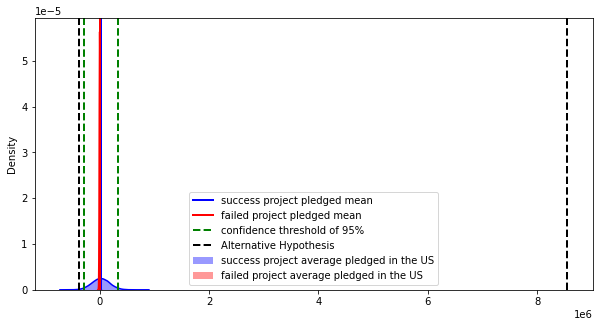

In [37]:
#Membuat grafik perbandingan data populasi
success_pop = np.random.normal(real_pledged_success.mean(),real_pledged_success.std(),100000)
failed_pop = np.random.normal(real_pledged_failed.mean(),real_pledged_failed.std(),100000)

ci = stats.norm.interval(0.95, real_pledged_success.mean(), real_pledged_success.std())
plt.figure(figsize=(10,5))
sns.distplot(success_pop, label='success project average pledged in the US', color='blue')
sns.distplot(failed_pop, label='failed project average pledged in the US',color='red')

plt.axvline(real_pledged_success.mean(), color='blue', linewidth=2, label='success project pledged mean')
plt.axvline(real_pledged_failed.mean(), color='red',  linewidth=2, label='failed project pledged mean')

plt.axvline(ci[1], color='green', linestyle='dashed', linewidth=2, label='confidence threshold of 95%')
plt.axvline(ci[0], color='green', linestyle='dashed', linewidth=2)

plt.axvline(success_pop.mean()+t_stat*success_pop.std(), color='black', linestyle='dashed', linewidth=2, label = 'Alternative Hypothesis')
plt.axvline(failed_pop.mean()-t_stat*failed_pop.std(), color='black', linestyle='dashed', linewidth=2)

plt.legend()


## Kesimpulan

Kesimpulan :

Berdasarkan nilai ***P-value(0.0)*** yang bernilai lebih kecil dari ***critical value (0.05)*** dan grafik diatas, dapat disimpulkan bahwa hipotesa H1 diterima dan hipotesa H0 ditolak yang berarti nilai uang yang didapatkan dari investor/supporter (pledged) pada project yang success berbeda secara signifikan dengan project yang failed